In [1]:
import numpy as np

# Настройка вывода, чтобы числа не выглядели как 1.23e+09
np.set_printoptions(suppress=True, precision=4)

In [2]:
# === 1. Создание матрицы M (85x85) ===
# Диагональ: 3, 5, 7, ... 171. Остальные 2.
# Формула диагонали: 2*k + 1, где k от 1 до 85.
# Но индексы от 0, значит 2*(i+1) + 1 = 2i + 3.

# Создаем матрицу, заполненную двойками
M = np.full((85, 85), 2)

# Создаем массив для диагонали
diag_values = np.arange(3, 172, 2) # от 3 до 171 с шагом 2

# Заменяем диагональ (np.fill_diagonal не возвращает новую, а меняет текущую)
np.fill_diagonal(M, diag_values)


# === 2. Создание матрицы N (85x85) ===
# Четные строки (0, 2..): 4, 4, 5, 4, 4, 5 ...
# Нечетные строки (1, 3..): 4, 7, 4, 7, 4, 7 ...

N = np.zeros((85, 85), dtype=int)

# Паттерн для четных строк: [4, 4, 5]
pattern_even = np.array([4, 4, 5])
# Повторяем паттерн нужное количество раз и обрезаем до 85 элементов
row_even = np.tile(pattern_even, 85 // 3 + 1)[:85]

# Паттерн для нечетных строк: [4, 7]
pattern_odd = np.array([4, 7])
row_odd = np.tile(pattern_odd, 85 // 2 + 1)[:85]

# Заполняем строки
N[0::2] = row_even  # Четные строки (с шагом 2)
N[1::2] = row_odd   # Нечетные строки (с шагом 2)


# === 3. Создание вектора p ===
# Элементы p ~ N(2, 4) + 1.
# В numpy scale - это стандартное отклонение (sigma).
# Дисперсия = 4, значит sigma = корень(4) = 2.
# Мат.ожидание = 2.
np.random.seed(42) # Фиксируем рандом, чтобы результаты были одинаковые
p = 1 + np.random.normal(loc=2, scale=2, size=85)


# === 4. Создание вектора q ===
# q^T = N[24] * N[71] (поэлементное умножение строк 24 и 71)
q = N[24] * N[71]

print("Размерность M:", M.shape)
print("Размерность N:", N.shape)
print("Размерность p:", p.shape)
print("Размерность q:", q.shape)

Размерность M: (85, 85)
Размерность N: (85, 85)
Размерность p: (85,)
Размерность q: (85,)


f = p*Tr(qv^T)


*   Tr(qv^T) - это след матрицы, полученной перемножением столбца q на строку v. Алгебраически след произведения A x B(где A столбец, B строка) равен скалярному произведению векторов v * q.
*   Вектор v вычисляется как: Vi = M84 - i, 84-i + Nii.

q = ||Q^B||1
 Это L1-норма вектора, который получается умножением вектора q на матрицу N.



In [3]:
# === Вычисление v ===
# v_i = M[84-i, 84-i] + 2 * N[i, i]

# M[84-i, 84-i] — это элементы главной диагонали M, взятые в обратном порядке
diag_M_reversed = np.diag(M)[::-1]
# N[i, i] — это элементы главной диагонали N
diag_N = np.diag(N)

v = diag_M_reversed + 2 * diag_N


# === Вычисление f ===
# f = p * Tr(q * v^T)
# След (Tr) матрицы, образованной внешним произведением q и v (q * v^T),
# равен скалярному произведению векторов q и v.
scalar_product = np.dot(q, v)
f = p * scalar_product


# === Вычисление g ===
# g = || q^T * N ||_1
# Сначала умножаем вектор q на матрицу N
vector_prod = np.dot(q, N)
# Считаем L1 норму (сумма модулей элементов)
g = np.linalg.norm(vector_prod, ord=1)


# === Вывод результатов ===
print("Значение f (первые 5 элементов):", f[:5])
print("Значение g:", g)

Значение f (первые 5 элементов): [ 797224.0664  543697.489   857503.3072 1206999.0847  505412.0504]
Значение g: 867476.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Для красивых графиков

# Магическая команда, чтобы графики рисовались прямо в ноутбуке
%matplotlib inline

# Скачиваем файл (команда для Colab)
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

# Читаем данные
df = pd.read_csv('titanic.csv')
# Выводим первые 5 строк
df.head()

--2025-12-23 18:18:33--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2025-12-23 18:18:33 (437 KB/s) - ‘titanic.csv’ saved [44225/44225]



,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Проверяем, есть ли пропуски (True - есть, False - нет)
print(df.isnull().any())

# Или более подробно (количество пропусков в каждом столбце)
print("\nКоличество пропусков:")
print(df.isnull().sum())

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool

Количество пропусков:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


In [6]:
# Фильтруем тех, кто ехал один
loners = df[(df['Siblings/Spouses Aboard'] == 0) & (df['Parents/Children Aboard'] == 0)]

# Считаем среднюю цену билета (Fare)
avg_fare_loners = loners['Fare'].mean()

print(f"Средняя цена билета пассажиров без родственников: {avg_fare_loners:.2f}")

Средняя цена билета пассажиров без родственников: 21.33


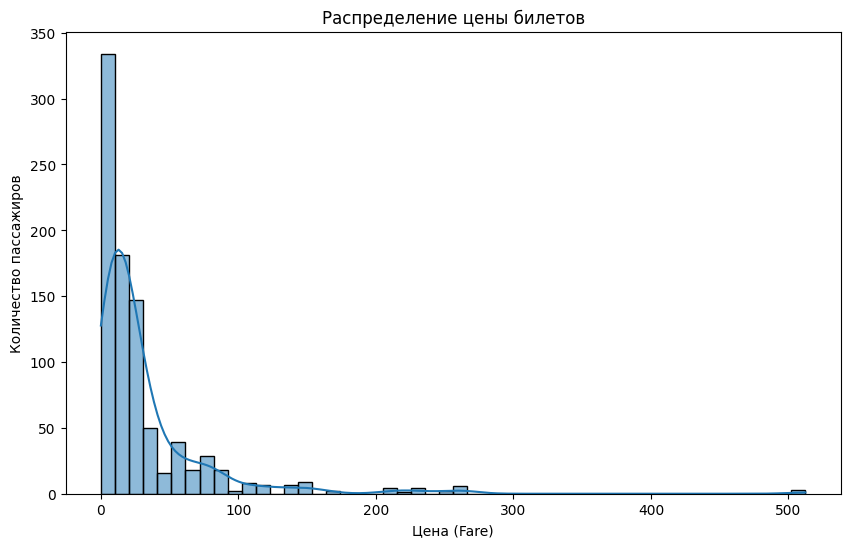

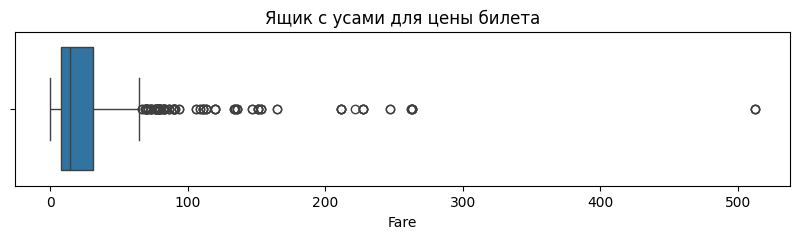

In [7]:
plt.figure(figsize=(10, 6))
# Строим гистограмму
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Распределение цены билетов')
plt.xlabel('Цена (Fare)')
plt.ylabel('Количество пассажиров')
plt.show()

# Проверка на выбросы (Boxplot - ящик с усами)
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Fare'])
plt.title('Ящик с усами для цены билета')
plt.show()

Распределение сильно скошено вправо (большинство билетов дешевые). Наблюдаются сильные выбросы (точки справа на boxplot) — это билеты стоимостью выше 200-500 фунтов.

Гипотеза: "Чем больше родственников, тем выше шанс погибнуть"

Процент гибели в зависимости от числа родственников:
Relatives
0     0.694184
1     0.447205
2     0.421569
3     0.275862
4     0.800000
5     0.863636
6     0.666667
7     1.000000
10    1.000000
Name: Survived, dtype: float64


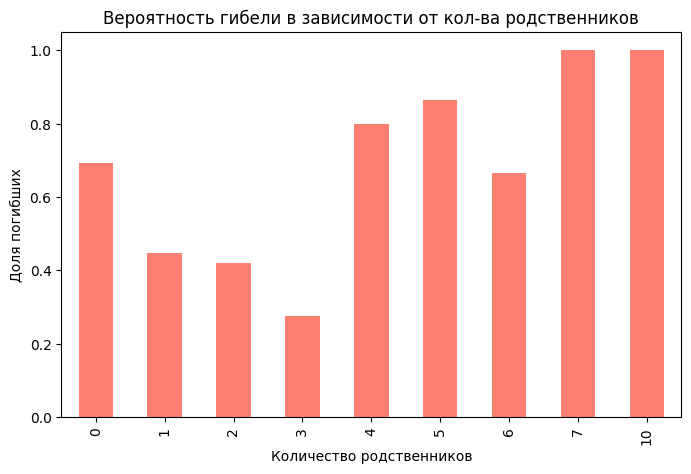

In [8]:
# 1. Создадим колонку "Всего родственников"
df['Relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

# 2. Сгруппируем по количеству родственников и посчитаем процент выживших
survival_by_relatives = df.groupby('Relatives')['Survived'].mean()

# 3. Посчитаем процент погибших (1 - выжившие)
death_rate_by_relatives = 1 - survival_by_relatives

print("Процент гибели в зависимости от числа родственников:")
print(death_rate_by_relatives)

# Визуализация
plt.figure(figsize=(8, 5))
death_rate_by_relatives.plot(kind='bar', color='salmon')
plt.title('Вероятность гибели в зависимости от кол-ва родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Доля погибших')
plt.show()

Посмотри на график.
Обычно у одиночек (0 родственников) риск гибели высокий.
У семей с 1-3 родственниками риск снижается (им помогают спастись).
У больших семей (4+ родственников) риск гибели снова резко растет (сложно спасти всех).
Вывод: Утверждение "Чем больше родственников, тем выше шанс погибнуть" верно только для больших семей (более 3 человек). Для малых семей оно неверно (там шанс выжить выше, чем у одиночек).


In [9]:
# drop удаляет, axis=1 означает столбец, inplace=True меняет сам датафрейм
df.drop('Name', axis=1, inplace=True)

# Проверяем
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


In [10]:
# Превращаем 'male'/'female' в столбцы 'Sex_female' и 'Sex_male' с 0 и 1
df = pd.get_dummies(df, columns=['Sex'])

# Проверяем
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,1,False,True
1,1,1,38.0,1,0,71.2833,1,True,False
2,1,3,26.0,0,0,7.9250,0,True,False
3,1,1,35.0,1,0,53.1000,1,True,False
4,0,3,35.0,0,0,8.0500,0,False,True


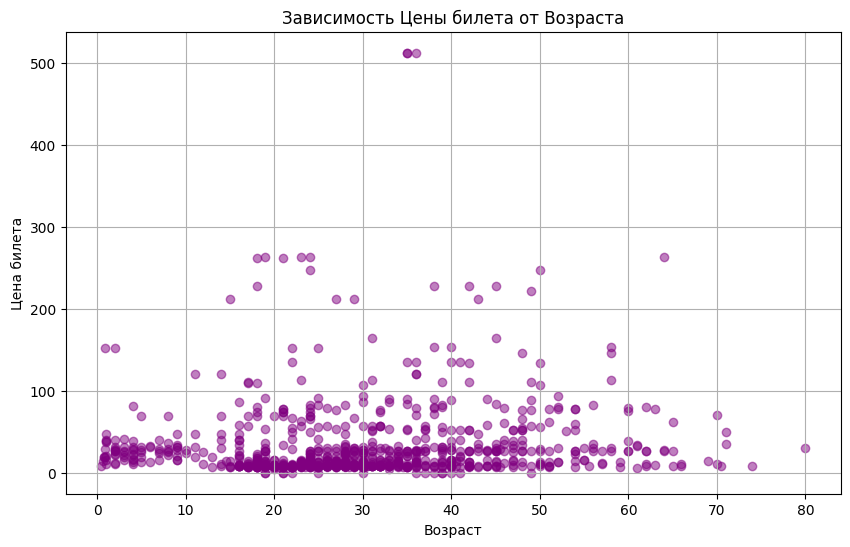

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Age'], y=df['Fare'], alpha=0.5, c='purple')
plt.title('Зависимость Цены билета от Возраста')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.grid(True)
plt.show()

Четкой линейной зависимости нет. Дорогие билеты покупали люди разных возрастов. Однако видно, что самые дорогие билеты (выбросы) в основном у людей от 18 до 50 лет.
Задание 8

In [12]:
# Используем MinMax Scaling: (x - min) / (max - min)
cols_to_norm = ['Age', 'Fare']

for col in cols_to_norm:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Выводим результат
print("Датасет после нормировки:")
df.head()

Датасет после нормировки:


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives,Sex_female,Sex_male
0,0,3,0.271174,1,0,0.014151,1,False,True
1,1,1,0.472229,1,0,0.139136,1,True,False
2,1,3,0.321438,0,0,0.015469,0,True,False
3,1,1,0.434531,1,0,0.103644,1,True,False
4,0,3,0.434531,0,0,0.015713,0,False,True


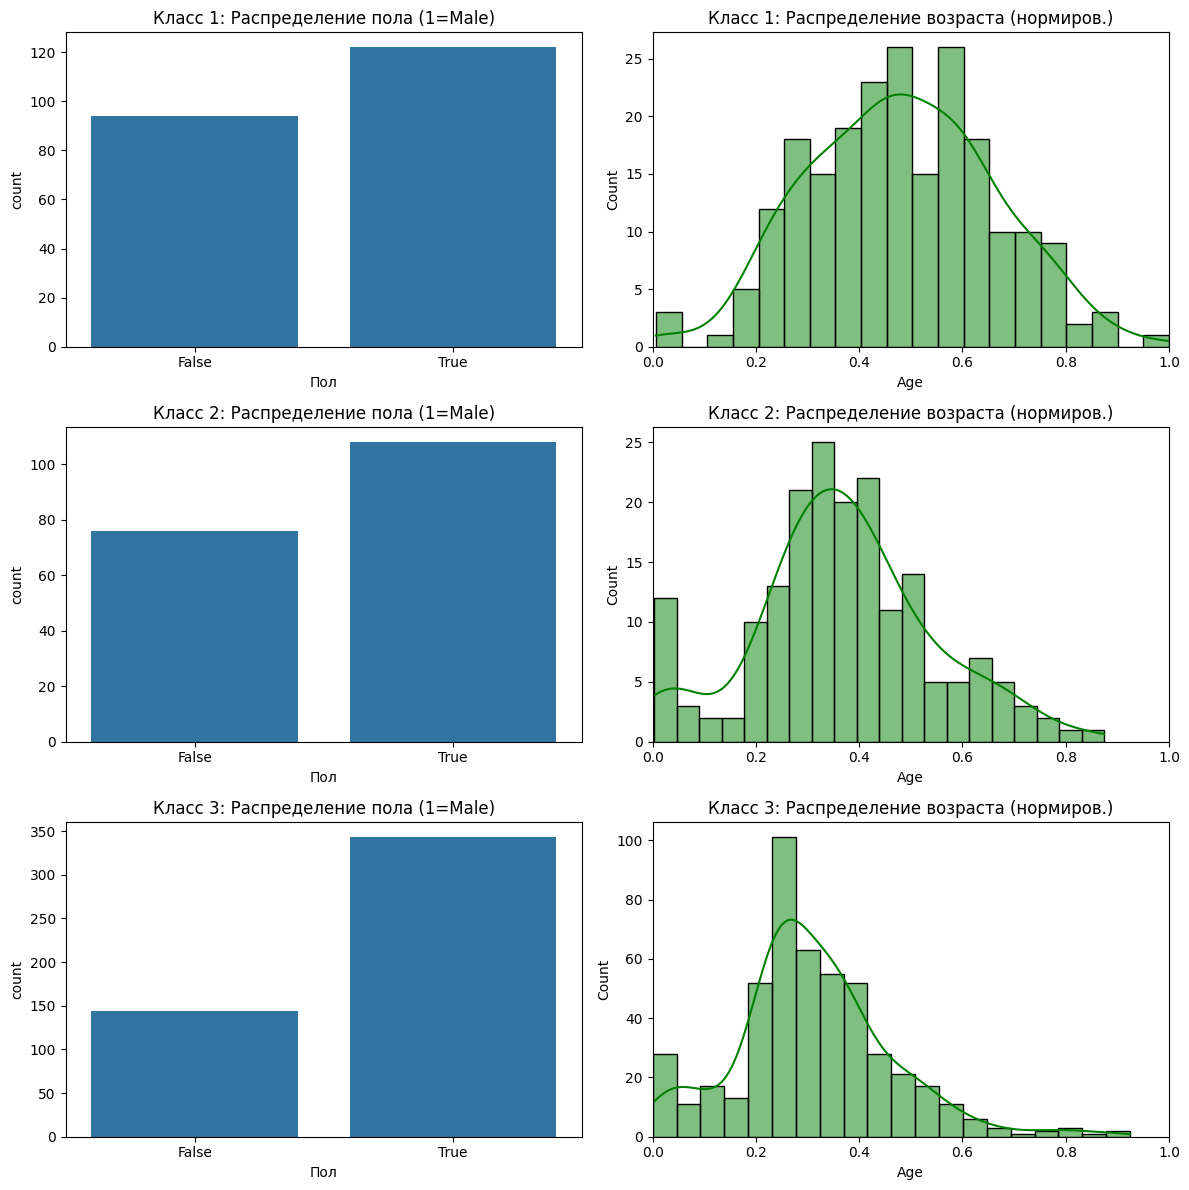

In [13]:
# Получаем список уникальных классов (1, 2, 3)
classes = sorted(df['Pclass'].unique())

# Создаем сетку графиков: 3 строки (по числу классов), 2 столбца (Пол и Возраст)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Мы уже закодировали пол в Sex_male/Sex_female.
# Чтобы построить гистограмму пола, нам нужно знать, сколько мужчин и женщин.
# Но так как мы сделали OHE, у нас теперь числа 0 и 1.
# Для наглядности построим гистограмму Возраста и просто countplot для исходного пола (восстановить сложнее)
# Или построим гистограмму распределения 'Sex_male' (где 1 это мужчина, 0 женщина).

for i, pclass in enumerate(classes):
    subset = df[df['Pclass'] == pclass]

    # График 1: Распределение пола (берем Sex_male: 1-муж, 0-жен)
    sns.countplot(x=subset['Sex_male'], ax=axes[i, 0])
    axes[i, 0].set_title(f'Класс {pclass}: Распределение пола (1=Male)')
    axes[i, 0].set_xlabel('Пол')

    # График 2: Распределение возраста
    sns.histplot(subset['Age'], bins=20, ax=axes[i, 1], kde=True, color='green')
    axes[i, 1].set_title(f'Класс {pclass}: Распределение возраста (нормиров.)')
    axes[i, 1].set_xlim(0, 1) # Так как мы нормировали данные от 0 до 1

plt.tight_layout()
plt.show()

В ходе лабораторной работы я научился работать с библиотекой Pandas: загружать данные, проводить фильтрацию, группировку и модификацию столбцов (удаление, OHE-кодирование, нормировка). Также с помощью Matplotlib и Seaborn были построены графики для визуального анализа зависимостей (гистограммы, диаграммы рассеяния, boxplot). Был проведен анализ выживаемости пассажиров Титаника в зависимости от размера семьи.